# Lab | Customer Analysis Round 3

## Show DataFrame info.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("csv_files/marketing_customer_analysis.csv")
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Describe DataFrame.

In [2]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Show a plot of the total number of responses.

In [3]:
import matplotlib.pyplot as plt

In [4]:
tnr_count = data["Response"].value_counts()

Text(0.5, 1.0, 'Number of Responses')

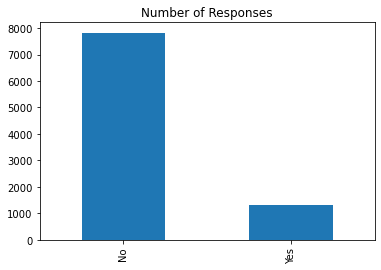

In [5]:
tnr_count.plot(kind="bar")
plt.title("Number of Responses")

##  Show a plot of the total responses for every sales channel.

In [22]:
rspsal = data[["Response", "Sales Channel"]]
rspsal['rspyes'] = np.where(rspsal['Response'] == "Yes" , 1, 0)
rspsal

<ipython-input-22-2c31eab65c1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rspsal['rspyes'] = np.where(rspsal['Response'] == "Yes" , 1, 0)


,Response,Sales Channel,rspyes
0,No,Agent,0
1,No,Agent,0
2,No,Agent,0
3,No,Call Center,0
4,No,Agent,0
...,...,...,...
9129,No,Web,0
9130,Yes,Branch,1
9131,No,Branch,0
9132,No,Branch,0


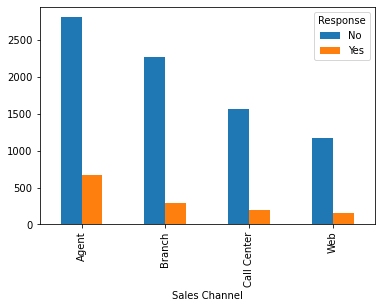

In [21]:
responseSc = pd.crosstab(rspsal["Sales Channel"] , rspsal["Response"])
#using CROSSTAB
responseSc.plot(kind='bar')

## Show a plot of the response rate by the total claim amount.

In [23]:
rsptca = data[["Response", "Total Claim Amount"]]
rsptca

,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


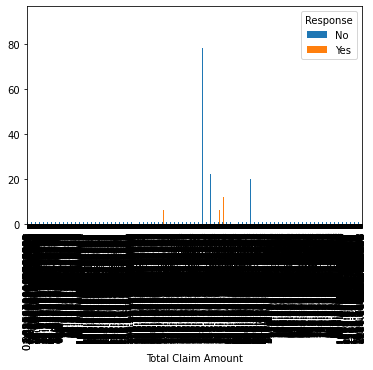

In [25]:
rsptcacross = pd.crosstab(rsptca["Total Claim Amount"] , rsptca["Response"])
#using CROSSTAB
rsptcacross.plot(kind='bar')